# Homework 3

1. Plot the transfer functions of the 2.5-b stage with redundancy and without redundancy. Also plot the plain 2-b transfer function. 


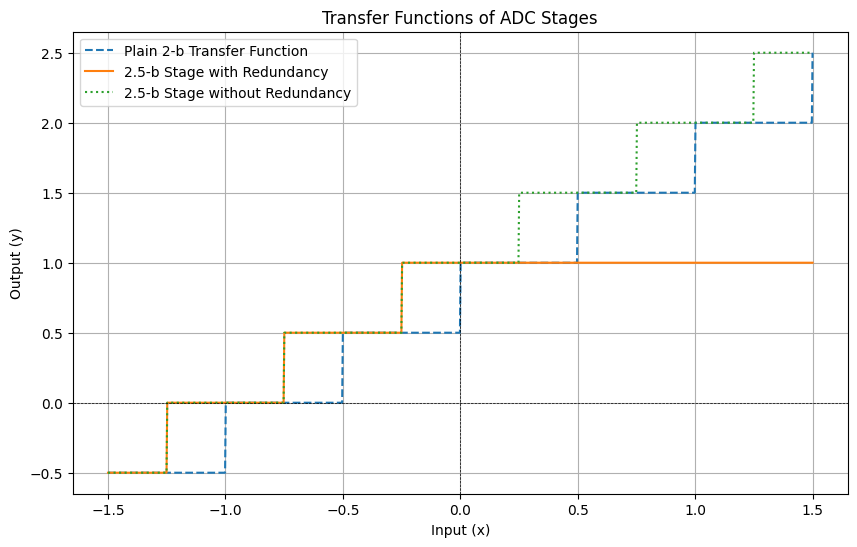

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1.5, 1.5, 1000)

y_2b = np.floor(2 * x + 2) / 2

#2.5-b stage with redundancy
y_25b_redundant = np.clip(np.floor(2 * x + 2.5) / 2, -1, 1)

#2.5-b stage without redundancy
y_25b_no_redundant = np.floor(2 * x + 2.5) / 2


#plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y_2b, label=" 2-b Transfer Function", linestyle='--')
plt.plot(x, y_25b_redundant, label="2.5-b Stage with Redundancy")
plt.plot(x, y_25b_no_redundant, label="2.5-b Stage without Redundancy", linestyle=':')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.title("Transfer Functions of ADC Stages")
plt.xlabel("Input (x)")
plt.ylabel("Output (y)")
plt.legend()
plt.grid()
plt.show()

2. Use a tone test input signal and introduce a V_R/8 offset in the comparators. Plot Vo and the SNR in each case. 

SNR without offset: 12.81 dB
SNR with offset: 11.73 dB


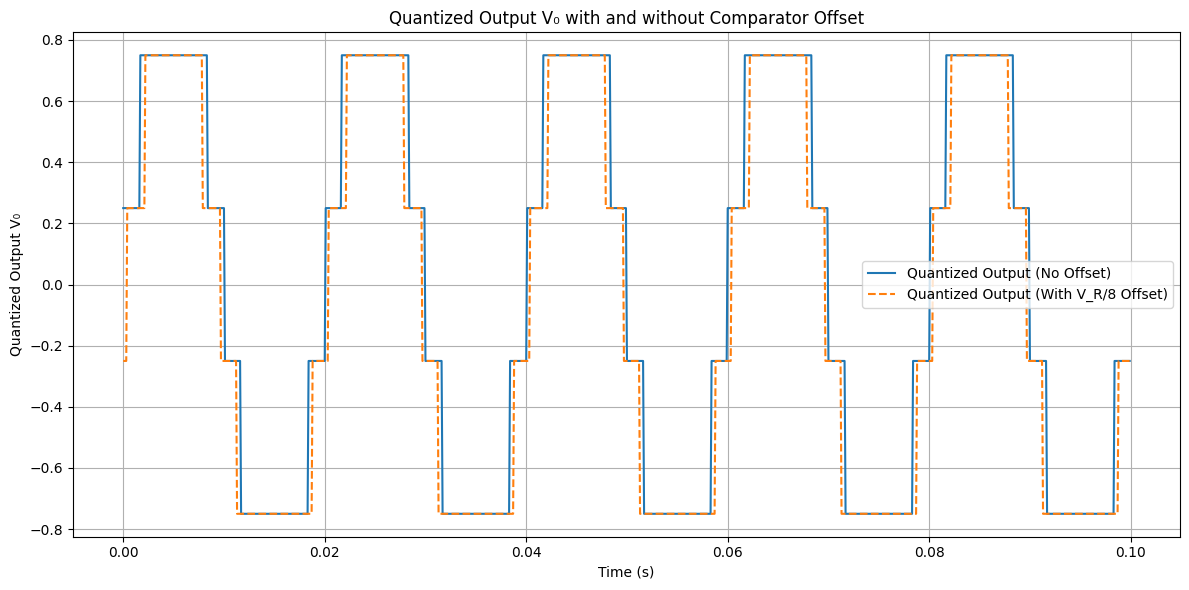

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000
f = 50 #test tone freq
t = np.linspace(0, 0.1, fs, endpoint=False) #0.1 to allow for it to be easier to see
tone_input = np.sin(2 * np.pi * f * t)

V_R = 1.0 #reference voltage
offset = V_R / 8 

thresholds_no_offset = np.array([-0.5, 0, 0.5])
levels = np.array([-0.75, -0.25, 0.25, 0.75])  

thresholds_with_offset = thresholds_no_offset + offset

def quantize(signal, thresholds, levels):
    quantized = np.zeros_like(signal)
    for i in range(len(thresholds) + 1):
        if i == 0:
            mask = signal < thresholds[0]
        elif i == len(thresholds):
            mask = signal >= thresholds[-1]
        else:
            mask = (signal >= thresholds[i - 1]) & (signal < thresholds[i])
        quantized[mask] = levels[i]
    return quantized


q_no_offset = quantize(tone_input, thresholds_no_offset, levels) #applying the offset results in a different quantization, so done twice
q_with_offset = quantize(tone_input, thresholds_with_offset, levels)

def calculate_snr(signal, quantized_signal):
    noise = signal - quantized_signal
    signal_power = np.mean(signal**2)
    noise_power = np.mean(noise**2)
    return 10 * np.log10(signal_power / noise_power)

snr_no_offset = calculate_snr(tone_input, q_no_offset)
snr_with_offset = calculate_snr(tone_input, q_with_offset)
print(f"SNR without offset: {snr_no_offset:.2f} dB")
print(f"SNR with offset: {snr_with_offset:.2f} dB")

plt.figure(figsize=(12, 6))
plt.plot(t, q_no_offset, label="Quantized Output (No Offset)")
plt.plot(t, q_with_offset, label="Quantized Output (With V_R/8 Offset)", linestyle='--')
plt.title("Quantized Output V₀ with and without Comparator Offset")
plt.xlabel("Time (s)")
plt.ylabel("Quantized Output V₀")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

